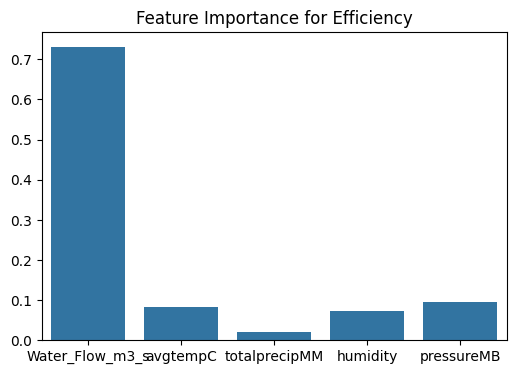

The most important feature affecting Efficiency is: Water_Flow_m3_s

Regression Model Performance:
                           Model  R² Train   R² Test
               Linear Regression  0.001365 -0.000415
Polynomial Regression (Degree 2)  0.001838 -0.000358
                   Decision Tree  0.687430  0.117438
                   Random Forest  0.646076  0.079674


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

stl_df = pd.read_csv("stl_energy_production_with_weather.csv")
hp_df = pd.read_csv("hp_energy_production_with_weather.csv")

# Efficiency as Energy Production per unit of Water Flow
stl_df["Efficiency"] = stl_df["Energy Production (kWh)"] / stl_df["Water_Flow_m3_s"]
hp_df["Efficiency"] = hp_df["Energy Production (kWh)"] / hp_df["Water_Flow_m3_s"]

stl_df["Efficiency"] = np.where(np.isinf(stl_df["Efficiency"]), np.nan, stl_df["Efficiency"])
hp_df["Efficiency"] = np.where(np.isinf(hp_df["Efficiency"]), np.nan, hp_df["Efficiency"])

stl_df = stl_df.dropna(subset=["Efficiency"])
hp_df = hp_df.dropna(subset=["Efficiency"])

stl_df = stl_df[stl_df["Efficiency"] < stl_df["Efficiency"].quantile(0.99)]
hp_df = hp_df[hp_df["Efficiency"] < hp_df["Efficiency"].quantile(0.99)]

features = ['Water_Flow_m3_s', 'avgtempC', 'totalprecipMM', 'humidity', 'pressureMB']
target = 'Efficiency'

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(stl_df[features], stl_df[target])  

importances = rf_model.feature_importances_

plt.figure(figsize=(6, 4))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance for Efficiency")
plt.show()

most_important_feature = features[importances.argmax()]
print(f"The most important feature affecting Efficiency is: {most_important_feature}")

X = stl_df[['Water_Flow_m3_s']]
Y = stl_df['Efficiency']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
linear_r2_train = linear_model.score(X_train, Y_train)
linear_r2_test = linear_model.score(X_test, Y_test)

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)
poly_r2_train = poly_model.score(X_poly_train, Y_train)
poly_r2_test = poly_model.score(X_poly_test, Y_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)
tree_r2_train = tree_model.score(X_train, Y_train)
tree_r2_test = tree_model.score(X_test, Y_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_r2_train = rf_model.score(X_train, Y_train)
rf_r2_test = rf_model.score(X_test, Y_test)

#  R² Scores for Train and Test
r2_results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (Degree 2)", "Decision Tree", "Random Forest"],
    "R² Train": [linear_r2_train, poly_r2_train, tree_r2_train, rf_r2_train],
    "R² Test": [linear_r2_test, poly_r2_test, tree_r2_test, rf_r2_test]
})

print("\nRegression Model Performance:")
print(r2_results.to_string(index=False))